# Speed Dating Data Analysis


# Part 0: Setup Google Drive Environment / Data Collection

In [ ]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# https://docs.google.com/spreadsheets/d/1SZddhHzdrSeaZD0wP4-96SQYOAFtQUfX/edit?usp=sharing&ouid=117953154631179589875&rtpof=true&sd=true
id = "1SZddhHzdrSeaZD0wP4-96SQYOAFtQUfX"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('speed_dating.xlsx')

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel('speed_dating.xlsx')
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,4.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,3.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,10.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,5.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,1.0,1.0,1.0,10.0,7.0,NaN,7.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(191), object(4)
memory usage: 12.5+ MB


In [ ]:
# check the unique values for each column
df.nunique()

iid         551
id           22
gender        2
idg          44
condtn        2
           ... 
attr5_3       9
sinc5_3       9
intel5_3      7
fun5_3       10
amb5_3        9
Length: 195, dtype: int64

### Part 1.2:  Understand the features

In [ ]:
# check missing values
df.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

# Part 2: Data Preprocessing

## Part 2.1: Data cleaning

In [ ]:
# Choose feature base on domain knowledge 
XY = df[['dec', 'dec_o', 'gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]

In [ ]:
XY.head()

,dec,dec_o,gender,round,position,order,int_corr,samerace,age_o,race_o,...,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
0,1.0,0.0,0.0,10.0,7.0,4.0,0.14,0.0,27.0,2.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,10.0,7.0,3.0,0.54,0.0,22.0,2.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,0.0,10.0,7.0,10.0,0.16,1.0,22.0,4.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,0.0,10.0,7.0,5.0,0.61,0.0,23.0,2.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,0.0,10.0,7.0,7.0,0.21,0.0,24.0,3.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop columns with too much null numbers
XYdrop = XY.drop(['field','expnum', 'undergra', 'income', 'mn_sat', 'tuition', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','zipcode', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr4_1'], axis=1)
XYdrop.shape[0]

8378

In [ ]:
# drop rows with null numbers
XYdrop_nonull = XYdrop.dropna()
XYdrop_nonull.reset_index(inplace=True, drop=True)
XYdrop_nonull.shape[0]
# XYdrop_nonull.shape[1]

8024

## Part 2.2: Stemming

In [ ]:
XYdrop_nonull['from'].unique()
XYdrop_nonull['from'].nunique()

266

In [ ]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
stopwords.append("yrs")
stopwords.append(" ")
stopwords.append("P")
stopwords.append("R")
stopwords.append(".")

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])
#XY['from'].unique()

We use 184 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer 

stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
            
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
XYdrop_nonull['from'][90:100] = "california"

for i in range(XYdrop_nonull.shape[0]):
  XYdrop_nonull['from'][i] = ''.join(tokenization_and_stemming(XYdrop_nonull['from'][i]))

<ipython-input-14-3c62503db0fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][90:100] = "california"
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-14-3c62503db0fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][i] = ''.join(tokenization_and_stemming(XYdrop_nonull['fro

In [ ]:
tokenization_and_stemming("I am from NYC")

['nyc']

In [ ]:
XYdrop_nonull['from'].unique()
XYdrop_nonull['from'].nunique()

228

In [ ]:
places = { 
       'chicago':'illinois', 
       #'alabama':, 
       #'connecticut':, 
       'texa':'texas', 
       'bowdoincolleg': "maine",
       'md':'maryland',
       'southerncalifornia':'california', 
       'londonengland':'england', 
       'palmspringcalifornia':'california',
       #'california':, 
       #'argentina':, 
       #'england':, 
       'cincinnatiohio':'ohio', 
       'miami':'florida',
       'milanitali':'italy', 
       'georgiausa':'georgia', 
       #'newyork':, 
       #'washingtondc':, 
       #'newjersey':,
       'annarbormi':'dontknow', 
       'hongkong':'china', 
       #'iowa':, 
       'westchestny':'newyork', 
       'boston':'massachusetts',
       #'michigan':, 
       'singapor':'singapore', 
       #'brazil':, 
       'brandeiunivers':'massachusetts', 
       'cincinnatioh':'ohio',
       'losangel':'california', 
       #'china':, 
       'sanfranciscohomeangelundergrad':'california', 
       #'spain':,
       #'israel':, 
       #'switzerland':, 
       'itali':'italy', 
       'philadelphia':'pennsylvania', 
       'houston':'texas',
       'brooklyn':'newyork', 
       #'florida':, 
       'tuscaloosaalabama':'alabama', 
       'albuquerqunm':'newmexico',
       'paloaltocalifornia':'california', 
       #'mexico':, 
       'torrancca':'california', 
       'louimo':'dontknow', 
       'londonuk':'london',
       #'minnesota': 
       #'ohio':, 
       '':'dontknow', 
       'washingtonstate':'washington', 
       #'panama':, 
       #'arizona':,
       'minneapolimn':'minnesota', 
       'nj':'newjersey',
       'sanfrancisco':'california', 
       #'bangladesh':,
       'longisland':'newyork', 
       'brooklynny':'newyork', 
       #'india':, 
       #'canada':, 
       #'colorado':,
       'annarbor':'michigan', 
       'philippin':'phillippines', 
       'milwaukewisconsin':'wisconsin', 
       'franc':'france',
       'longislandny':'newyork', 
       #'puertorico':, 
       'memphitn':'tennessee', 
       #'louisiana':, 
       #'maryland':,
       'statenisland':'newyork', 
       'newyorkny':'newyork', 
       'massachusett':'massachusetts', 
       'pougkeepsiny':'newyork',
       'sofiabg':'bulgaria', 
       'greenwichct':'conneticut', 
       #'taiwan':, 
       'europ':'dontknow', 
       #'colombia':, 
       #'albania':,
       'pa':'pennsylvania', 
       'cherrihillnj':'newyork', 
       'minneapoli':'minnesota', 
       'nyc':'newyork', 
       'ottawacanada':'canada',
       'philadelphiapa':'pennsylvania', 
       'atlantaga':'georgia', 
       'cleveland':'ohio', 
       'nycstatenisland':'newyork',
       'greec':'greece', 
       #'northcarolina':, 
       'statecollegpa':'pennsylvania', 
       'detroit':'michigan',
       'washingtondcmetroregion':'washingtondc', 
       'berkeleyca':'california', 
       'buffalony':'newyork',
       #'pennsylvania':, 
       'sandiegoca':'california', 
       #'uzbekistan':, 
       #'nebraska':, 
       'queen':'newyork',
       'kansa':'kansas', 
       'atlanta':'georgia', 
       #'uruguay':, 
       #'azerbaijan':, 
       'losangelca':'california',
       'newyorkciti':'newyork', 
       'rochestny':'newyork', 
       'taipeitaiwan':'taiwan', 
       'berkeley':'california',
       'northerncalifornia':'california', 
       'silverspringmd':'maryland', 
       #'vestal':, 
       'texaboston':'dontknow',
       #'cameroon':, 
       #'bulgaria':, 
       'newyorknewjersey':'newyork', 
       'baltimor':'maryland', 
       'dc':'washingtondc',
       'germani':'germany', 
       'washdc':'washingtondc', 
       #'sweden':, 
       'pittsburgh':'pennsylvania', 
       'detroitmichiganusa':'michigan',
       #'morgan':, 
       #'virginia':, 
       #'indiana':, 
       #'wisconsin':,
       'bornmontanaraissouthjerseynrphiladelphia':'dontknow', 
       'portlandoregon':'oregon',
       'seattl':'washington', 
       'lexington':'massachusetts', 
       'shanghaichina':'china', 
       #'chile':,
       'torontolondonindia':'dontknow',
       #'japan':, 
       'bouldercolorado':'colorado',
       'northernvirginia':'virginia', 
       'malaysiamassachusett':'dontknow',
       'katonahnyrecentboston':'newyork', 
       'warsawpoland':'poland', 
       #'washington':, 
       'toronto':"canada",
       'czechrepubl':'czechrepublic', 
       #'siberia':, 
       'newhopepa':'pennsylvania', 
       'lasveganevada':'nevada', 
       #'budapest':,
       #'russia':, 
       'uncc':'dontknow', 
       #'iceland':, 
       'internstudent':'dontknow', 
       #'nepal':,
       'northernnewjersey':'newjersey', 
       'grewnebraska':'nebraska', 
       'cambridgmassachusett':'massachusetts',
       'newdelhiindia':'india',
       'waylittlspaceworldcitizen':'dontknow', 
       'francnewyork':'dontknow',
       'tokyotexa':'dontknow', 
       'eripa':'nigeria', 
       'westchestnewyork':'newyork', 
       'greatneckny':'newyork',
       'californiawestcoast':'california', 
       'portland':'oregon', 
       'new':'dontknow', 
       'dallatexa':'texas',
       'bombayindia':'india', 
       'paloaltoca':'california', 
       #'newmexico':, 
       'manhattan':'newyork',
       'californianewyork':'dontknow', 
       'bronxscienc':'newyork', 
       'nashvilltn':'tennessee', 
       #'australia':,
       'torontocanada':'canada', 
       'midwestusa':'dontknow', 
       #'costarica':, 
       #'southkorea':'korea',
       #'yugoslavia', 
       'nycsanfrancisco':'california', 
       #'oregon':, 
       'sanfranciscoca':'california',
       'floridavirginia':'dontknow', 
       'sanfranciscobayarea':'california', 
       'hawaiilosangel':'hawaii',
       #'korea':, 
       'pari':'france', 
       'austintx':'texas', 
       'tn':'tennessee', 
       'pittsburghpa':'pennsylvania', 
       'milanoitali':'italy',
       #'poland':, 
       'burlingtonvermont':'vermont', 
       'bogotacolombia':'columbia', 
       'asiasingapor':'singapore',
       'santabarbaracalifornia':'california', 
       'cambridg':'massachusetts', 
       'ctfltn':'dontknow', 
       'detroitsuburb':'michigan',
       'tokyojapan':'japan', 
       #'southcarolina':, 
       'californianewjersey':'dontknow', 
       #'belgium':,
       'westchestcounti':'newyork', 
       #'romania':, 
       'southorangnewjersey':'newjersey',
       'colombiasouthamerica':'columbia', 
       'kansacitimissouri':'missouri', 
       'upstatnewyork':'newyork',
       'manilaphilippin':'phillipines', 
       'work':'dontknow', 
       'sandiego':'california', 
       #'hawaii':, 
       'saltlakeciti':'utah',
       'saratogany':'newyork', 
       'hkg':'china', 
       'beijchina':'china', 
       'san':'dontknow', 
       'borniran':'iran', 
       #'persia':,
       #'indonesia':, 
       'indianj':'india', 
       'genovaitali':'italy', 
       'uk':'england', 
       'londonnewyork':'dontknow',
       'ny':'newyork'
}

In [ ]:
for i in range(len(XYdrop_nonull)):
  if XYdrop_nonull['from'][i] in places:
    XYdrop_nonull['from'][i] = places[XYdrop_nonull['from'][i]]

<ipython-input-18-4914cf2f9bf7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XYdrop_nonull['from'][i] = places[XYdrop_nonull['from'][i]]


In [ ]:
XYdrop_nonull['from'].unique()
XYdrop_nonull['from'].nunique()

92

## Part 2.3: Encoding

In [ ]:
X = XYdrop_nonull.drop(['dec', 'dec_o'], axis=1)
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

In [ ]:
cat_cols

Index(['from'], dtype='object')

In [ ]:
num_cols

Index(['gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o',
       'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb',
       'pf_o_sha', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal',
       'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1'],
      dtype='object')

### ordinal encoding

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# categories = ['from']
# enc_oe = OrdinalEncoder()
# enc_oe.fit(X[categories])
# X[categories] = enc_oe.transform(X[categories])
# cat_cols = X.columns[X.dtypes == 'O']
# num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]
# cat_cols

### feature hasher

In [ ]:
from sklearn.feature_extraction import FeatureHasher

nf = 4

fea_hs = FeatureHasher(n_features=nf, input_type='string')
hasherd = fea_hs.fit_transform(X['from'])

hash_data = pd.DataFrame(hasherd.toarray(), columns=[f'from_{i}' for i in range(nf)])

# keep a copy of husher result
hasher_data = pd.concat([X['from'], hash_data], axis=1, ignore_index=False)
# hasher_data = hasher_data.drop_duplicates(subset='from',ignore_index=True)
print(hasher_data.drop_duplicates(subset='from',ignore_index=True).head())

# change the dataset
X = pd.concat([X, hash_data], axis=1, ignore_index=False).drop('from',axis=1)
print(X.head())

cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'float64') | (X.dtypes == 'int64')]

          from  from_0  from_1  from_2  from_3
0     illinois     1.0    -3.0     0.0     0.0
1      alabama     2.0    -1.0     4.0     0.0
2  connecticut    -1.0    -4.0     0.0     0.0
3        texas     0.0     0.0     1.0     0.0
4        maine     0.0    -1.0     1.0     1.0
   gender  round  position  order  int_corr  samerace  age_o  race_o  \
0     0.0   10.0       7.0    4.0      0.14       0.0   27.0     2.0   
1     0.0   10.0       7.0    3.0      0.54       0.0   22.0     2.0   
2     0.0   10.0       7.0   10.0      0.16       1.0   22.0     4.0   
3     0.0   10.0       7.0    5.0      0.61       0.0   23.0     2.0   
4     0.0   10.0       7.0    7.0      0.21       0.0   24.0     3.0   

   pf_o_att  pf_o_sin  ...  shar2_1  attr3_1  sinc3_1  fun3_1  intel3_1  \
0      35.0      20.0  ...      5.0      6.0      8.0     8.0       8.0   
1      60.0       0.0  ...      5.0      6.0      8.0     8.0       8.0   
2      19.0      18.0  ...      5.0      6.0      8.0     8.

### encode labels

In [ ]:
Y = XYdrop_nonull[['dec','dec_o']]
Y = Y['dec']*2 + Y['dec_o']*1
Y.unique()

array([2., 3., 1., 0.])

## Part 2.4: Dataset spliting

In [ ]:
from sklearn import model_selection
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, stratify = Y, random_state = 0) #stratified sampling

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 6419 observation with 61 features
test data has 1605 observation with 61 features


## Part 2.5: Standardize

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
X_train

,gender,round,position,order,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,from_0,from_1,from_2,from_3
1313,0.999221,0.249046,1.599316,1.661460,-1.890970,1.215492,0.734327,-0.619590,-0.671963,0.372276,...,-0.320253,-0.060548,-2.331395,-0.449377,-2.248502,-0.901310,-0.518485,0.841181,-0.047438,0.266430
4118,0.999221,0.944705,-0.926991,-1.457418,-0.630392,-0.822712,1.853692,0.994839,0.215418,1.796879,...,-1.134605,0.660519,1.195477,1.446277,1.472817,0.218610,-1.430307,0.078103,-1.090254,0.266430
6859,0.999221,-0.446614,1.057964,-1.273955,0.066243,-0.822712,0.174645,0.187625,-0.994648,-0.340026,...,-0.320253,-0.060548,1.195477,0.814392,-0.387843,0.218610,1.305161,0.841181,-0.047438,1.564015
2177,0.999221,-0.214727,0.336162,0.744143,-0.000103,1.215492,0.454486,0.994839,-1.014009,0.302470,...,0.766093,-1.502680,-2.331395,-1.713147,-3.178831,-1.461271,0.393338,-0.684975,0.995378,0.915223
3275,-1.000779,-1.837933,-1.468342,-1.273955,-2.753471,-0.822712,-0.385038,0.994839,-0.187937,1.796879,...,1.308452,-0.781614,0.490103,0.814392,-0.387843,0.778571,2.216983,-0.684975,0.995378,-3.626324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7585,0.999221,1.176592,0.516613,2.211850,-0.099623,-0.822712,-0.105197,0.187625,0.215418,1.084578,...,1.308452,2.102651,1.195477,-1.081262,1.472817,1.338531,-0.518485,-1.448053,-0.047438,-0.382362
1222,-1.000779,0.249046,1.418865,-1.457418,1.824417,1.215492,0.454486,-0.619590,-0.187937,0.372276,...,-0.320253,1.381585,1.195477,0.814392,0.542487,0.778571,0.393338,-0.684975,0.995378,0.915223
5455,0.999221,0.712819,0.336162,0.560679,-1.327028,-0.822712,2.413375,0.994839,-0.591292,-0.340026,...,-0.320253,0.660519,0.490103,0.814392,-0.387843,0.778571,2.216983,0.078103,0.995378,-1.031154
707,0.999221,0.480932,0.155712,1.477997,0.928744,1.215492,0.174645,-0.619590,-0.994648,0.372276,...,-0.320253,0.660519,0.490103,0.182507,-0.387843,0.218610,2.216983,-0.684975,0.995378,-3.626324


# Part 3: Model Training and Result Evaluation

### Part 3.1: Model Training

In [ ]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# Support Vector Machine
classifier_SVM = SVC()

In [ ]:
# LR
classifier_logistic.fit(X_train, y_train)
classifier_logistic.predict(X_test)
LR_score = classifier_logistic.score(X_test, y_test)
print(LR_score)

0.40062305295950157


In [ ]:
# KNN
classifier_KNN.fit(X_train, y_train)
classifier_KNN.predict(X_test)
KNN_score = classifier_KNN.score(X_test, y_test)
print(KNN_score)

0.4255451713395639


In [ ]:
# RF
classifier_RF.fit(X_train, y_train)
classifier_RF.predict(X_test)
RF_score = classifier_RF.score(X_test, y_test)
print(RF_score)

0.45109034267912773


In [ ]:
# SVM
classifier_SVM.fit(X_train, y_train)
classifier_SVM.predict(X_test)
SVM_score = classifier_SVM.score(X_test, y_test)
print(SVM_score)

0.43987538940809967


## Part 3.2: Result Visualization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

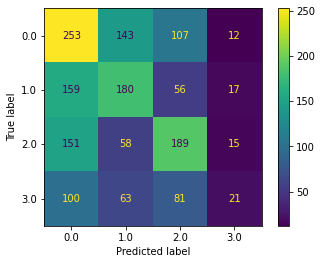

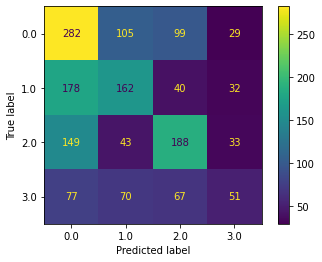

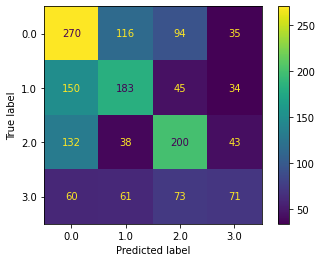

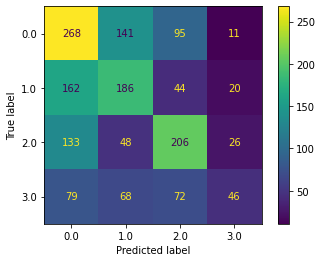

In [ ]:
plot_confusion_matrix(classifier_logistic, X_test, y_test) 
plot_confusion_matrix(classifier_KNN, X_test, y_test)
plot_confusion_matrix(classifier_RF, X_test, y_test)
plot_confusion_matrix(classifier_SVM, X_test, y_test)

## Part 3.3: Hyperparameter

In [ ]:
from sklearn.model_selection import GridSearchCV

def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [ ]:
np.random.seed(99)
parameters = {
    # 'n_estimators' : np.arange(80,100,10),
    # 'max_depth': np.arange(10,20,5)
    'n_estimators' : [250],
    'max_depth': [20]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters,scoring='f1',cv=5)
Grid_RF.fit(X_train, y_train.values.ravel())

In [ ]:
print_grid_search_metrics(Grid_RF)

Best score: nan
Best parameters set:
max_depth:20
n_estimators:250


0.45109034267912773
0.45794392523364486


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


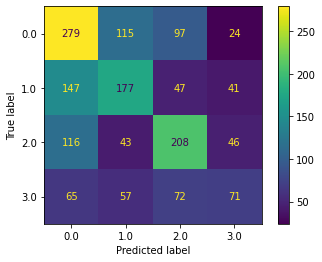

In [ ]:
best_RF_model = Grid_RF.best_estimator_
print(RF_score)
best_RF_score = best_RF_model.score(X_test, y_test)
print(best_RF_score)
plot_confusion_matrix(best_RF_model, X_test, y_test) 

# Part 4: Result Analysis and Applications

## Part 4.1: Feature importance

In [ ]:
X_RF = pd.concat([X_train, X_test])

In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, Y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
int_corr : 0.0753
order : 0.0697
age_o : 0.0583
pf_o_sin : 0.0544
pf_o_att : 0.0541
pf_o_sha : 0.0536
pf_o_fun : 0.0524
pf_o_amb : 0.0524
pf_o_int : 0.0511
position : 0.0383
race_o : 0.0306
samerace : 0.0149
age : 0.0103
attr2_1 : 0.01
attr1_1 : 0.0099
hiking : 0.0097
sinc1_1 : 0.0096
shar1_1 : 0.0095
field_cd : 0.0094
sinc2_1 : 0.0093
amb1_1 : 0.0092
fun1_1 : 0.0092
amb2_1 : 0.0092
exercise : 0.0092
tv : 0.0092
intel1_1 : 0.0092
round : 0.0091
shopping : 0.0091
clubbing : 0.009
yoga : 0.009
shar2_1 : 0.009
sports : 0.0089
fun2_1 : 0.0089
concerts : 0.0088
tvsports : 0.0087
gaming : 0.0086
intel2_1 : 0.0085
theater : 0.0083
art : 0.0082
imprelig : 0.0082
reading : 0.008
imprace : 0.008
exphappy : 0.0078
museums : 0.0078
movies : 0.0076
music : 0.0076
amb3_1 : 0.0074
dining : 0.0074
fun3_1 : 0.0073
date : 0.0071
sinc3_1 : 0.007
from_3 : 0.0068
attr3_1 : 0.0067
from_1 : 0.0063
intel3_1 : 0.0062
go_out : 0.0062
from_0 : 0.0061
goal : 0.00

## Part 4.2: Recommadation System

In [ ]:
X_r = df[['iid', 'gender', 'round', 'position', 'order', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]
X_r = X_r.drop(['field','expnum', 'undergra', 'income', 'mn_sat', 'tuition', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1','zipcode', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr4_1'], axis=1)
X_r = X_r.dropna()
X_r.reset_index(inplace=True, drop=True)
X_r.shape[0]
# X_r.drop_duplicates(subset='from', inplace=True)

8024

In [ ]:
X_r = pd.concat([X_r, hash_data], axis=1, ignore_index=False).drop('from',axis=1)

In [ ]:
X_index = X_r['iid']
X_r = X_r.drop('iid', axis=1)

In [ ]:
your_name = 'Helena'
gender = 0  #0 for female, 1 for male
# 1: 2: 3: 4: 5: 6:
X_r['race_o'] = 2
X_r['age_o'] = 24
#  add up to 100
X_r['pf_o_sin'] = 10
X_r['pf_o_att'] = 30
X_r['pf_o_sha'] = 10
X_r['pf_o_fun'] = 20
X_r['pf_o_amb'] = 0
X_r['pf_o_int'] = 10

In [ ]:
num_cols = X_r.columns[(X_r.dtypes == 'float64') | (X_r.dtypes == 'int64')]

In [ ]:
X_r[num_cols] = scaler.transform(X_r[num_cols])

In [ ]:
y_pred = best_RF_model.predict(X_r)

In [ ]:
save_index = 0
count = 0
print(your_name + ' is matched with:')
for i in range(0,y_pred.shape[0]):
  if X_r.iloc[i]['gender'] > 0: #if the user's gender is male, change '>' to '<'
    if y_pred[i] == 3:
      if X_index[i] != save_index:
        print(X_index[i], end='\t', flush=False)
        count += 1
      save_index = X_index[i]
print()
print('Totally ' + str(count) + ' matches.')

Helena is matched with:
14.0	19.0	46.0	48.0	49.0	50.0	55.0	67.0	74.0	97.0	99.0	105.0	107.0	109.0	125.0	127.0	128.0	140.0	166.0	169.0	172.0	173.0	217.0	219.0	226.0	243.0	248.0	250.0	279.0	288.0	289.0	316.0	319.0	332.0	335.0	336.0	362.0	366.0	367.0	369.0	371.0	372.0	398.0	400.0	404.0	408.0	409.0	410.0	412.0	422.0	423.0	428.0	429.0	448.0	482.0	489.0	491.0	492.0	533.0	535.0	537.0	538.0	546.0	549.0	550.0	552.0	
Totally 66 matches.
